Credentials are already in use. The existing account in the session will be replaced.


{'011': 2328, '000': 1641, '101': 18, '100': 117, '110': 7, '010': 1725, '001': 2246, '111': 110}
Job Status: job has successfully run


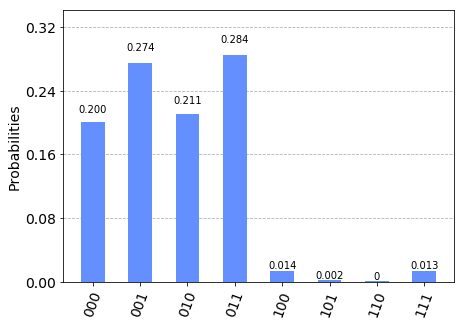

In [15]:
import numpy
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ
from math import pi
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

# Create a Quantum Register with 2 qubits.
c = ClassicalRegister (3, 'c')
q = QuantumRegister(4, 'q')

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(q,c)

##################
qc.h(q[1])
qc.u3(0,0,0,q[3])
qc.cx(q[1],q[2])
qc.u1(0*pi/10,q[1])
qc.u1(0*pi/10,q[2])
qc.ch(q[3],q[1])
qc.h(q[2])
qc.measure(q[1], c[0])
qc.measure(q[2], c[1])
qc.measure(q[3],c[2])
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_ourense')
            # Compile and run the Quantum Program on a real device backend
job_exp = execute(qc, backend=backend, shots=8192, max_credits=10)
result = job_exp.result()

# Show the results
print(result.get_counts(qc))
job_monitor(job_exp)
plot_histogram(result.get_counts(qc))
